In [ ]:
# !pip3 install --upgrade setuptools==65.5.0
# !pip install import_ipynb --quiet
# !pip install --quiet stable_baselines3
# !git clone https://github.com/gmshroff/aiagentarch.git
# %cd aiagentarch

In [ ]:
import gym
from stable_baselines3 import A2C,PPO
import import_ipynb
import numpy as np

In [ ]:
from cartpole_tasks import CartPoleEnv

In [ ]:
env = CartPoleEnv()

In [ ]:
# env.length=4

In [ ]:
obs = env.reset()
for i in range(10):
    action=env.action_space.sample()
    obs, reward, done, info = env.step(action)
    # env.render()
    if done: break
print(i,done)

In [ ]:
# model = PPO("MlpPolicy", env, verbose=0)
model.learn(total_timesteps=30000)

In [ ]:
import torch
torch.save(model.policy.state_dict(),'/tmp/Cartpole.pth')

In [ ]:
import torch
model.policy.load_state_dict(torch.load('/tmp/Cartpole.pth'))

In [ ]:
from tqdm.notebook import trange, tqdm
def eval(env,model,trials=3):
    total=0
    print(env.length,env.gravity)
    for e in trange(trials):
        obs = env.reset()
        for i in range(1000):
            action, _state = model.predict(obs, deterministic=True)
            obs, reward, done, info = env.step(action)
            # env.render()
            if done: break
        total+=i
    return total/trials

In [ ]:
eval(env,model)

In [ ]:
perf={}
for g in range(10,210,10):
    perf[g]={}
    for l4 in range(2,22):
        env.length,env.gravity=l4/4,g
        env.polemass_length = env.masspole * env.length
        r=eval(env,model)
        print(r)
        perf[g][l4/4]=r

In [ ]:
# import pickle
# with open('./perf.pickle','wb') as f: pickle.dump(perf,f)

In [59]:
with open('./perf.pickle','rb') as f: perf=pickle.load(f)

In [61]:
h=np.zeros((20,20))
i,j=0,0
for g in range(10,210,10):
    j=0
    for l4 in range(2,22):
        h[i][j]=perf[g][l4/4]
        # print(i,j,g,l4/4,perf[g][l4/4])
        j+=1
    i+=1

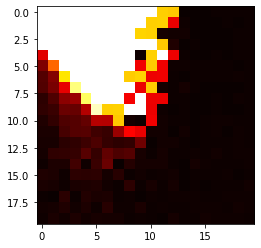

In [62]:
import matplotlib.pyplot as plt
plt.imshow(h, cmap='hot', interpolation='nearest')
plt.show()

In [63]:
perf[10]

{0.5: 999.0,
 0.75: 999.0,
 1.0: 999.0,
 1.25: 999.0,
 1.5: 999.0,
 1.75: 999.0,
 2.0: 999.0,
 2.25: 999.0,
 2.5: 999.0,
 2.75: 999.0,
 3.0: 999.0,
 3.25: 682.3333333333334,
 3.5: 674.0,
 3.75: 25.666666666666668,
 4.0: 25.0,
 4.25: 26.0,
 4.5: 26.666666666666668,
 4.75: 27.333333333333332,
 5.0: 27.666666666666668,
 5.25: 27.666666666666668}

In [67]:
perf.keys()

dict_keys([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])